In [2]:
!pip install autoscraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from autoscraper import AutoScraper

In [4]:
amazon_url = "https://www.amazon.in/realme-Storage-Processor-Triple-Display/dp/B09RMG1M98/ref=sr_1_1"

wanted_list = ["Great Deal, Valued Product !"]

In [5]:
scraper = AutoScraper()
result = scraper.build(amazon_url,wanted_list)
print(result)

['Great Deal, Valued Product !', 'Good Phone under 13k budget!', 'Not happy with this phone', 'Really Wasted My Hard Earned Money', 'Super speed and awesome looking', 'Do not update your software. Sims does not detect after update', 'RAM Expansion not available with base variant.', 'Unsatisfied by the features and real experience']


In [6]:
scraper.get_result_similar(amazon_url,grouped=True)

{'rule_7swk': ['Great Deal, Valued Product !',
  'Good Phone under 13k budget!',
  'Not happy with this phone'],
 'rule_crqy': ['Great Deal, Valued Product !'],
 'rule_fo79': ['Great Deal, Valued Product !',
  'Really Wasted My Hard Earned Money',
  'Super speed and awesome looking',
  'Do not update your software. Sims does not detect after update',
  'RAM Expansion not available with base variant.',
  'Unsatisfied by the features and real experience',
  'Good Phone under 13k budget!',
  'Not happy with this phone']}

In [7]:
scraper.set_rule_aliases({'rule_7swk':'Review','rule_fo79':'Review','rule_crqy':'Review'})
scraper.keep_rules(['rule_7swk','rule_fo79','rule_crqy'])
scraper.save('amazon_search')

In [8]:
results=scraper.get_result_similar(amazon_url,group_by_alias=True)

In [9]:
results

{'Review': ['Great Deal, Valued Product !',
  'Great Deal, Valued Product !',
  'Great Deal, Valued Product !',
  'Really Wasted My Hard Earned Money',
  'Super speed and awesome looking',
  'Do not update your software. Sims does not detect after update',
  'RAM Expansion not available with base variant.',
  'Unsatisfied by the features and real experience',
  'Good Phone under 13k budget!',
  'Good Phone under 13k budget!',
  'Not happy with this phone',
  'Not happy with this phone']}

In [11]:
import numpy as np 
import pandas as pd
from pandas import read_csv
import string 
import spacy 
import re
from itertools import islice
from nltk import tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [12]:
data=pd.DataFrame.from_dict(results)

In [13]:
data

,Review
0,"Great Deal, Valued Product !"
1,"Great Deal, Valued Product !"
2,"Great Deal, Valued Product !"
3,Really Wasted My Hard Earned Money
4,Super speed and awesome looking
5,Do not update your software. Sims does not det...
6,RAM Expansion not available with base variant.
7,Unsatisfied by the features and real experience
8,Good Phone under 13k budget!
9,Good Phone under 13k budget!


In [14]:
data.duplicated().sum()

4

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.reset_index(drop=True,inplace=True)

In [17]:
data

,Review
0,"Great Deal, Valued Product !"
1,Really Wasted My Hard Earned Money
2,Super speed and awesome looking
3,Do not update your software. Sims does not det...
4,RAM Expansion not available with base variant.
5,Unsatisfied by the features and real experience
6,Good Phone under 13k budget!
7,Not happy with this phone


In [18]:
data.shape

(8, 1)

In [19]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [20]:
df = data['Review'].apply(clean)
df

0                           great deal valued product 
1                   really wasted my hard earned money
2                      super speed and awesome looking
3    do not update your software sims does not dete...
4        ram expansion not available with base variant
5      unsatisfied by the features and real experience
6                             good phone under  budget
7                            not happy with this phone
Name: Review, dtype: object

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(df)
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
# print(nouns_verbs[5:25])

In [ ]:
# cv = CountVectorizer()

# X = cv.fit_transform(nouns_verbs)
# sum_words = X.sum(axis=0)
# words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
# words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
# wf_df = pd.DataFrame(words_freq)
# wf_df.columns = ['word', 'count']

# wf_df[0:10]

In [22]:
word_list = ' '.join(df)

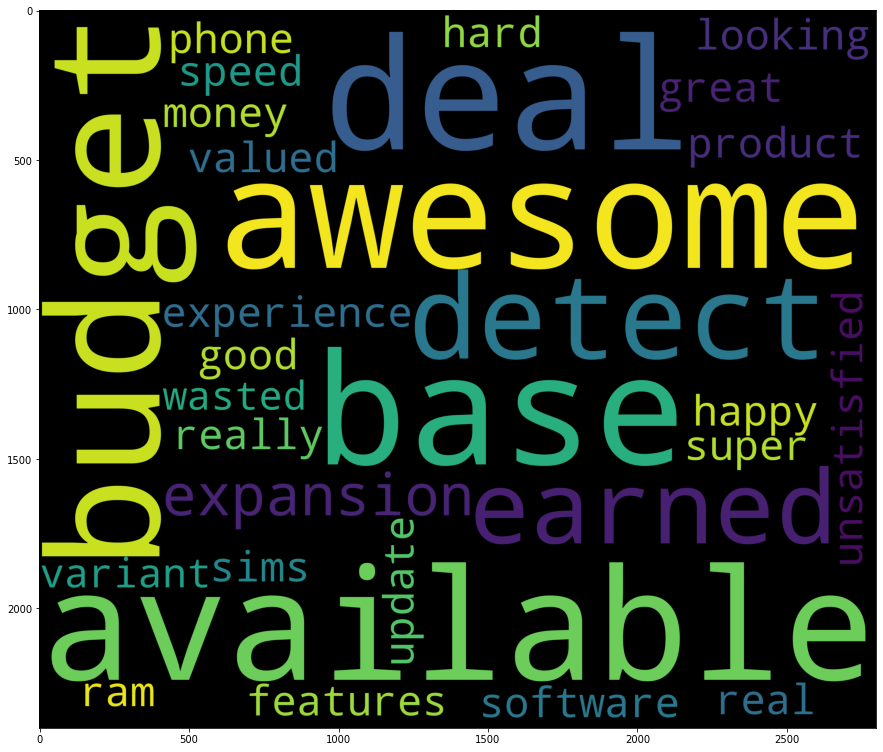

In [23]:
plt.figure(figsize=(15,15))
wordcloud = WordCloud(
                      background_color='black',
                      width=2800,
                      height=2400
                     ).generate(word_list)
plt.imshow(wordcloud)

In [44]:


with open('/content/positive-words.txt','r') as pw:
    positive_words = pw.read().split("\n")

In [45]:
with open("/content/negative-words.txt","r",encoding = "ISO-8859-1") as nw:
    negative_words = nw.read().split("\n")

In [46]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

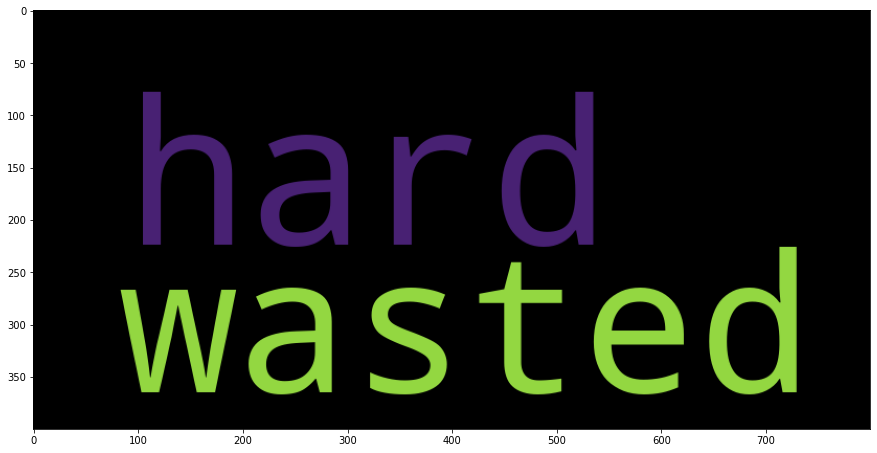

In [47]:
plt.figure(figsize=(15,15))
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=800,
                      height=400
                     ).generate(txt_neg_in_nw)
plt.imshow(wordcloud_neg)

In [48]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words ])

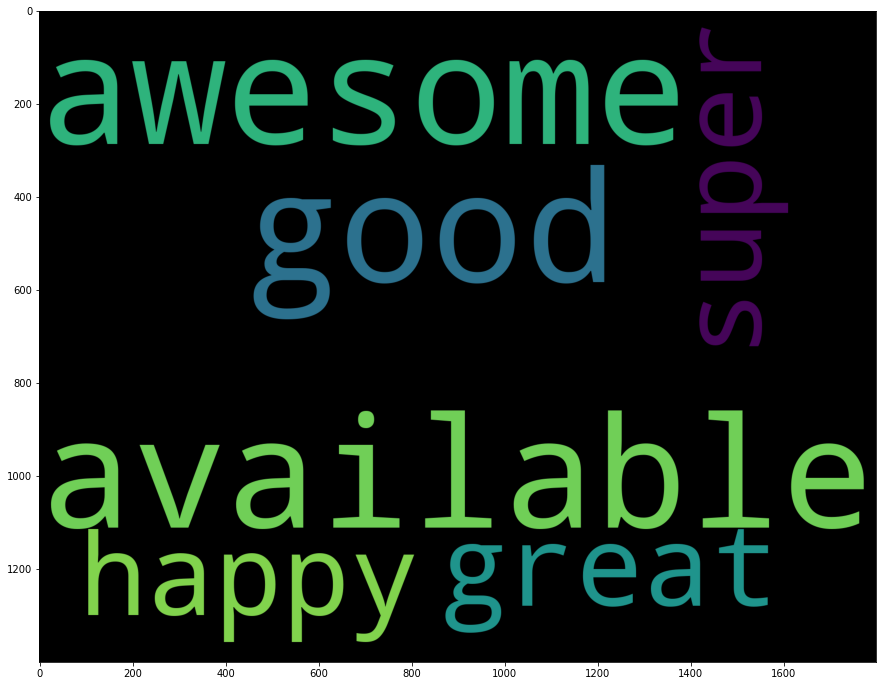

In [49]:
plt.figure(figsize=(15,15))
wordcloud_pos= WordCloud(background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)
plt.imshow(wordcloud_pos)